In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import sleap, get confidence maps on some nice data, etc...

In [4]:
from markovids import vid

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
import os
import copy
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
import pandas as pd
import toml
import h5py
from qd_analysis.fig import setup_plotting_env

In [6]:
save_dir = "/mnt/data/jmarkow/panels/2024-06 (QD paper)"


In [43]:
vid_dir = "/home/jmarkow/data_dir/active_projects/quantum_dots/photobleaching_slides/session_20241021122909-449662 (system76-pc)/"



In [44]:
avis = sorted(glob.glob(os.path.join(vid_dir, "*.avi")))

In [45]:
use_file = avis[0]

In [46]:
reader = vid.io.AutoReader(use_file)

In [47]:
tstamps_file = os.path.splitext(use_file)[0] + ".txt"

In [48]:
tstamps = vid.io.read_timestamps(tstamps_file)

In [49]:
zero_time = tstamps["system_timestamp"].diff().cumsum()

In [50]:
_test = reader.get_frames()

In [51]:
reader.close()

In [194]:
# roi_y = slice(500,600)
# roi_x = slice(400,500)

roi_y = slice(560,570)
roi_x = slice(470,483)

In [195]:
blank_y = slice(650,660)
blank_x = slice(550,565)

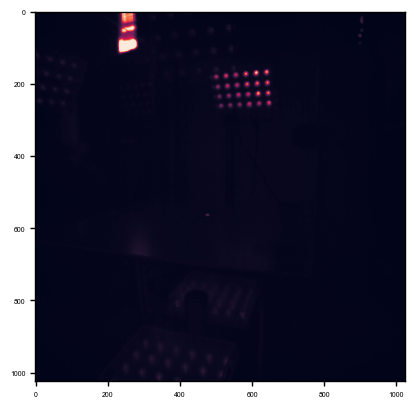

In [196]:
plt.imshow(_test[200])

In [197]:
ctrl_trace = _test[1:,blank_y,blank_x].max(axis=(1,2))
roi_trace = _test[1:,roi_y,roi_x].max(axis=(1,2))
xvec = zero_time[1:] / 3600

In [198]:
setup_plotting_env()

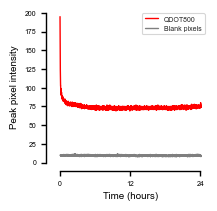

In [199]:
fig, ax = plt.subplots(1, figsize=(2,2))
ax.plot(xvec, roi_trace, color="r", label="QDOT800")
ax.plot(xvec, ctrl_trace, color="k", alpha=.5, label="Blank pixels")
ax.legend()
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Peak pixel intensity")
# ax.axvline(x=xvec[500])
# plt.ylim(0, 150)
ax.set_xticks([0,12,24])
sns.despine(offset=5, trim=True)
# plt.xlim(0,2000)

In [200]:
_test_norm = _test.copy().astype("float32")

In [210]:
# _test_norm -= _test_norm.mean(axis=(1,2), keepdims=True)
# _test_norm /= _test_norm.std(axis=(1,2), keepdims=True)


In [223]:
_test[-1:,roi_y,roi_x].mean(axis=0, keepdims=False)

array([[ 5.,  6.,  8., 12., 12., 15., 14., 16., 15., 15., 15., 10.,  8.],
       [ 4.,  8., 13., 17., 19., 22., 21., 26., 27., 23., 20., 15., 11.],
       [ 5., 13., 19., 27., 32., 35., 35., 41., 40., 35., 30., 18., 15.],
       [10., 15., 25., 49., 65., 57., 54., 62., 61., 60., 58., 26., 15.],
       [ 8., 14., 31., 72., 73., 60., 54., 60., 61., 75., 73., 28., 17.],
       [ 6., 13., 24., 41., 48., 52., 49., 53., 54., 60., 44., 25., 14.],
       [ 5.,  8., 17., 23., 27., 30., 26., 32., 33., 33., 26., 19., 14.],
       [ 5.,  4., 10., 14., 16., 18., 15., 19., 19., 17., 17., 14.,  9.],
       [ 4.,  6.,  4.,  7.,  7., 10.,  8., 10.,  8., 10.,  8.,  7.,  7.],
       [ 3.,  5.,  6.,  6.,  5.,  5.,  6.,  7.,  4.,  6.,  5.,  5.,  7.]])

In [228]:
corrs = []
for i in range(len(_test)):
    corrs.append(np.abs(_test[i,roi_y,roi_x] - _test[-50:,roi_y,roi_x].mean(axis=0, keepdims=False)).mean())

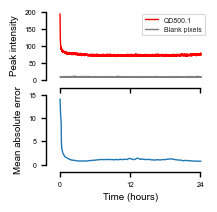

In [236]:
fig, ax = plt.subplots(2, 1, figsize=(2,2), sharex=True)
ax[0].plot(xvec, roi_trace, color="r", label="QD800.1")
ax[0].plot(xvec, ctrl_trace, color="k", alpha=.5, label="Blank pixels")
ax[0].set_ylabel("Peak intensity")
ax[0].legend()
# ax.axvline(x=xvec[500])
# plt.ylim(0, 150)
ax[0].set_xticks([0,12,24])
# plt.xlim(0,2000)
ax[1].plot(zero_time / 3600, pd.Series(corrs).rolling(50,1,True).mean())
ax[1].set_ylim(0,15)
ax[1].set_xlabel("Time (hours)")
ax[1].set_ylabel("Mean absolute error")


sns.despine(offset=5, trim=True)
fig.savefig(os.path.join(save_dir, "qd_photobleaching.pdf"), bbox_inches="tight")
# plt.xlim(0,1000)

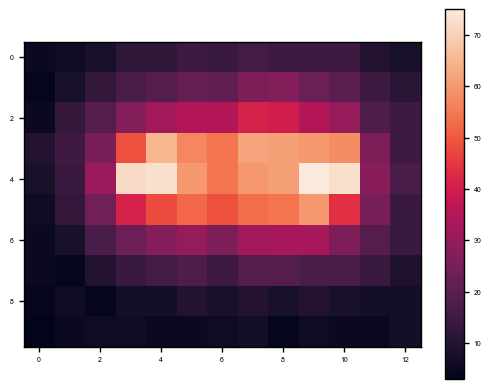

In [206]:
plt.imshow(_test[-1,roi_y,roi_x])
plt.colorbar()

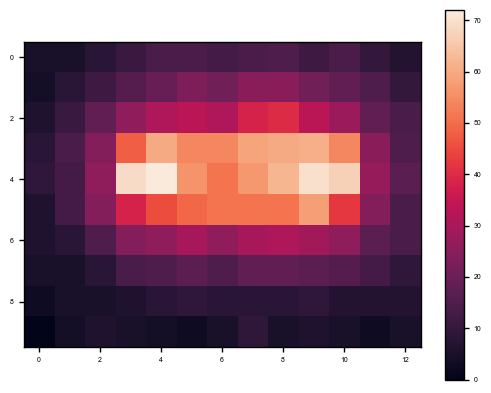

In [207]:
plt.imshow(_test[-1000,roi_y,roi_x])
plt.colorbar()

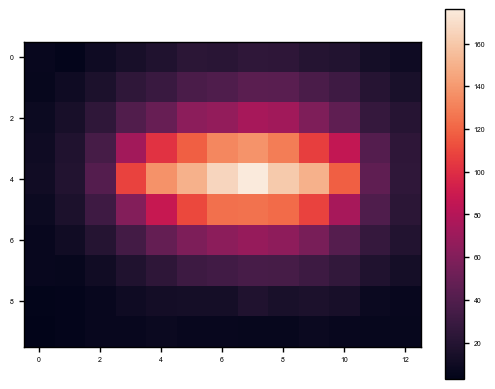

In [208]:
plt.imshow(_test[2,roi_y,roi_x])
plt.colorbar()

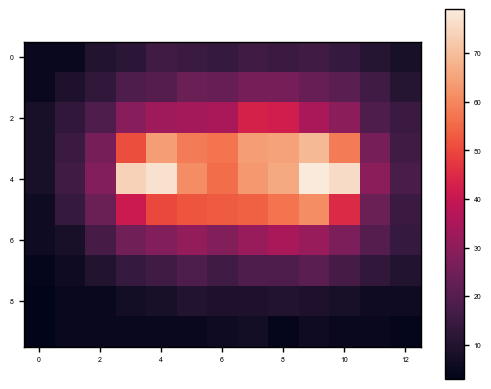

In [209]:
plt.imshow(_test[200,roi_y,roi_x])
plt.colorbar()